In [38]:
from funcs import (
    make_train_test_split_for_lot,
    print_label_distribution,
    compute_cnn_features_for_split,
    fuse_concat,
    fuse_mean,
    fuse_sum,
    fuse_weighted,
    train_models,
    evaluate_models,
    plot_confusion_matrix_for_model,
    compute_texture_features_for_split,
    cross_validate_all,
    evaluate_by_weather_all,
    collect_errors_for_model,
    plot_error_examples,
    evaluate_models_on_new_fusions
)

# Obtendo samples

In [2]:
base_dir = 'PKLot/PKLot/PKLotSegmented'

In [3]:
ufpr04_train, ufpr04_test, ufpr04_train_days, ufpr04_test_days = make_train_test_split_for_lot(
    base_dir,
    lot_name="UFPR04",
)

In [4]:
pucpr_train, pucpr_test, pucpr_train_days, pucpr_test_days = make_train_test_split_for_lot(
    base_dir,
    lot_name="PUC",
)

In [5]:
print_label_distribution("UFPR04 - treino", ufpr04_train)
print_label_distribution("UFPR04 - teste", ufpr04_test)
print_label_distribution("PUC - treino", pucpr_train)
print_label_distribution("PUC - teste", pucpr_test)


UFPR04 - treino:
  Total: 7000
  Empty   :  3500  (50.00%)
  Occupied:  3500  (50.00%)

UFPR04 - teste:
  Total: 2000
  Empty   :  1000  (50.00%)
  Occupied:  1000  (50.00%)

PUC - treino:
  Total: 7000
  Empty   :  3500  (50.00%)
  Occupied:  3500  (50.00%)

PUC - teste:
  Total: 2000
  Empty   :  1000  (50.00%)
  Occupied:  1000  (50.00%)


In [6]:
# verificando se tem imagens em comum entre treino e teste
train_paths = {s.path for s in ufpr04_train}
test_paths  = {s.path for s in ufpr04_test}
print("UFPR04 paths em comum:", len(train_paths & test_paths))

train_paths = {s.path for s in pucpr_train}
test_paths  = {s.path for s in pucpr_test}
print("PUC paths em comum:", len(train_paths & test_paths))

UFPR04 paths em comum: 0
PUC paths em comum: 0


# Extraindo features

In [7]:
# ufpr04_treino features
ufpr04_train_feats, ufpr04_train_y = compute_cnn_features_for_split(
    ufpr04_train,
    batch_size=64,
    num_workers=4,
)

c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weight

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [8]:
# ufpr04_teste features
ufpr04_test_feats, ufpr04_test_y = compute_cnn_features_for_split(
    ufpr04_test,
    batch_size=64,
    num_workers=4,
)

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [9]:
# puc_treino features
pucpr_train_feats, pucpr_train_y = compute_cnn_features_for_split(
    pucpr_train,
    batch_size=64,
    num_workers=4,
)

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [10]:
# puc_teste features
pucpr_test_feats, pucpr_test_y = compute_cnn_features_for_split(
    pucpr_test,
    batch_size=64,
    num_workers=4,
)

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [11]:
# split com lbp
# ufpr04_treino_lbp features
ufpr04_train_lbp_feats, ufpr04_train_lbp_y = compute_texture_features_for_split(ufpr04_train)
# ufpr04_teste_lbp features
ufpr04_test_lbp_feats, ufpr04_test_lbp_y = compute_texture_features_for_split(ufpr04_test)
# puc_treino_lbp features
pucpr_train_lbp_feats, pucpr_train_lbp_y = compute_texture_features_for_split(pucpr_train)
# puc_teste_lbp features
pucpr_test_lbp_feats, pucpr_test_lbp_y = compute_texture_features_for_split(pucpr_test)

# Realizando fusoes

In [12]:
# concatenacao

# ufpr04
X_train_concat_ufpr04 = fuse_concat(ufpr04_train_feats)
X_test_concat_ufpr04 = fuse_concat(ufpr04_test_feats)
# lbp
X_train_concat_ufpr04_lbp = fuse_concat(ufpr04_train_lbp_feats)
X_test_concat_ufpr04_lbp = fuse_concat(ufpr04_test_lbp_feats)

# pucpr
X_train_concat_pucpr = fuse_concat(pucpr_train_feats)
X_test_concat_pucpr = fuse_concat(pucpr_test_feats)
# lbp
X_train_concat_pucpr_lbp = fuse_concat(pucpr_train_lbp_feats)
X_test_concat_pucpr_lbp = fuse_concat(pucpr_test_lbp_feats)

print('X_train_concat_ufpr04 shape:', X_train_concat_ufpr04.shape)
print('X_test_concat_ufpr04 shape:', X_test_concat_ufpr04.shape)
print('X_train_concat_pucpr shape:', X_train_concat_pucpr.shape)
print('X_test_concat_pucpr shape:', X_test_concat_pucpr.shape)
print('X_train_concat_ufpr04_lbp shape:', X_train_concat_ufpr04_lbp.shape)
print('X_test_concat_ufpr04_lbp shape:', X_test_concat_ufpr04_lbp.shape)
print('X_train_concat_pucpr_lbp shape:', X_train_concat_pucpr_lbp.shape)
print('X_test_concat_pucpr_lbp shape:', X_test_concat_pucpr_lbp.shape)

X_train_concat_ufpr04 shape: (7000, 7424)
X_test_concat_ufpr04 shape: (2000, 7424)
X_train_concat_pucpr shape: (7000, 7424)
X_test_concat_pucpr shape: (2000, 7424)
X_train_concat_ufpr04_lbp shape: (7000, 59)
X_test_concat_ufpr04_lbp shape: (2000, 59)
X_train_concat_pucpr_lbp shape: (7000, 59)
X_test_concat_pucpr_lbp shape: (2000, 59)


In [13]:
# media
# ufpr04
X_train_mean_ufpr04 = fuse_mean(ufpr04_train_feats)
X_test_mean_ufpr04 = fuse_mean(ufpr04_test_feats)
# lbp
X_train_mean_ufpr04_lbp = fuse_mean(ufpr04_train_lbp_feats)
X_test_mean_ufpr04_lbp = fuse_mean(ufpr04_test_lbp_feats)

# pucpr
X_train_mean_pucpr = fuse_mean(pucpr_train_feats)
X_test_mean_pucpr = fuse_mean(pucpr_test_feats)
# lbp
X_train_mean_pucpr_lbp = fuse_mean(pucpr_train_lbp_feats)
X_test_mean_pucpr_lbp = fuse_mean(pucpr_test_lbp_feats)

print('X_train_mean_ufpr04 shape:', X_train_mean_ufpr04.shape)
print('X_test_mean_ufpr04 shape:', X_test_mean_ufpr04.shape)
print('X_train_mean_pucpr shape:', X_train_mean_pucpr.shape)
print('X_test_mean_pucpr shape:', X_test_mean_pucpr.shape)
print('X_train_mean_ufpr04_lbp shape:', X_train_mean_ufpr04_lbp.shape)
print('X_test_mean_ufpr04_lbp shape:', X_test_mean_ufpr04_lbp.shape)
print('X_train_mean_pucpr_lbp shape:', X_train_mean_pucpr_lbp.shape)
print('X_test_mean_pucpr_lbp shape:', X_test_mean_pucpr_lbp.shape)

X_train_mean_ufpr04 shape: (7000, 1280)
X_test_mean_ufpr04 shape: (2000, 1280)
X_train_mean_pucpr shape: (7000, 1280)
X_test_mean_pucpr shape: (2000, 1280)
X_train_mean_ufpr04_lbp shape: (7000, 59)
X_test_mean_ufpr04_lbp shape: (2000, 59)
X_train_mean_pucpr_lbp shape: (7000, 59)
X_test_mean_pucpr_lbp shape: (2000, 59)


In [14]:
# soma
# ufpr04    
X_train_sum_ufpr04 = fuse_sum(ufpr04_train_feats)
X_test_sum_ufpr04 = fuse_sum(ufpr04_test_feats)
# lbp
X_train_sum_ufpr04_lbp = fuse_sum(ufpr04_train_lbp_feats)
X_test_sum_ufpr04_lbp = fuse_sum(ufpr04_test_lbp_feats)

# pucpr
X_train_sum_pucpr = fuse_sum(pucpr_train_feats)
X_test_sum_pucpr = fuse_sum(pucpr_test_feats)
# lbp
X_train_sum_pucpr_lbp = fuse_sum(pucpr_train_lbp_feats)
X_test_sum_pucpr_lbp = fuse_sum(pucpr_test_lbp_feats)

print('X_train_sum_ufpr04 shape:', X_train_sum_ufpr04.shape)
print('X_test_sum_ufpr04 shape:', X_test_sum_ufpr04.shape)
print('X_train_sum_pucpr shape:', X_train_sum_pucpr.shape)
print('X_test_sum_pucpr shape:', X_test_sum_pucpr.shape)
print('X_train_sum_ufpr04_lbp shape:', X_train_sum_ufpr04_lbp.shape)
print('X_test_sum_ufpr04_lbp shape:', X_test_sum_ufpr04_lbp.shape)
print('X_train_sum_pucpr_lbp shape:', X_train_sum_pucpr_lbp.shape)
print('X_test_sum_pucpr_lbp shape:', X_test_sum_pucpr_lbp.shape)

X_train_sum_ufpr04 shape: (7000, 1280)
X_test_sum_ufpr04 shape: (2000, 1280)
X_train_sum_pucpr shape: (7000, 1280)
X_test_sum_pucpr shape: (2000, 1280)
X_train_sum_ufpr04_lbp shape: (7000, 59)
X_test_sum_ufpr04_lbp shape: (2000, 59)
X_train_sum_pucpr_lbp shape: (7000, 59)
X_test_sum_pucpr_lbp shape: (2000, 59)


In [15]:
# ponderada
weights = {"vgg16": 0.5, "resnet50": 0.3, "mobilenet_v2": 0.2}
weights_lbp = {"lbp": 1.0}

# ufpr04
X_train_weighted_ufpr04 = fuse_weighted(ufpr04_train_feats, weights)
X_test_weighted_ufpr04 = fuse_weighted(ufpr04_test_feats, weights)
# lbp
X_train_weighted_ufpr04_lbp = fuse_weighted(ufpr04_train_lbp_feats, weights_lbp)
X_test_weighted_ufpr04_lbp = fuse_weighted(ufpr04_test_lbp_feats, weights_lbp)

# pucpr
X_train_weighted_pucpr = fuse_weighted(pucpr_train_feats, weights)
X_test_weighted_pucpr = fuse_weighted(pucpr_test_feats, weights)
# lbp
X_train_weighted_pucpr_lbp = fuse_weighted(pucpr_train_lbp_feats, weights_lbp)
X_test_weighted_pucpr_lbp = fuse_weighted(pucpr_test_lbp_feats, weights_lbp)

print('X_train_weighted_ufpr04 shape:', X_train_weighted_ufpr04.shape)
print('X_test_weighted_ufpr04 shape:', X_test_weighted_ufpr04.shape)
print('X_train_weighted_pucpr shape:', X_train_weighted_pucpr.shape)
print('X_test_weighted_pucpr shape:', X_test_weighted_pucpr.shape)
print('X_train_weighted_ufpr04_lbp shape:', X_train_weighted_ufpr04_lbp.shape)
print('X_test_weighted_ufpr04_lbp shape:', X_test_weighted_ufpr04_lbp.shape)
print('X_train_weighted_pucpr_lbp shape:', X_train_weighted_pucpr_lbp.shape)
print('X_test_weighted_pucpr_lbp shape:', X_test_weighted_pucpr_lbp.shape)

X_train_weighted_ufpr04 shape: (7000, 1280)
X_test_weighted_ufpr04 shape: (2000, 1280)
X_train_weighted_pucpr shape: (7000, 1280)
X_test_weighted_pucpr shape: (2000, 1280)
X_train_weighted_ufpr04_lbp shape: (7000, 59)
X_test_weighted_ufpr04_lbp shape: (2000, 59)
X_train_weighted_pucpr_lbp shape: (7000, 59)
X_test_weighted_pucpr_lbp shape: (2000, 59)


In [16]:
datasets_fusions = {
    "UFPR04": {
        "concat": (X_train_concat_ufpr04, X_test_concat_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "mean": (X_train_mean_ufpr04, X_test_mean_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "sum": (X_train_sum_ufpr04, X_test_sum_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "weighted": (X_train_weighted_ufpr04, X_test_weighted_ufpr04, ufpr04_train_y, ufpr04_test_y),
        'concat_lbp': (X_train_concat_ufpr04_lbp, X_test_concat_ufpr04_lbp, ufpr04_train_lbp_y, ufpr04_test_lbp_y),
        'mean_lbp': (X_train_mean_ufpr04_lbp, X_test_mean_ufpr04_lbp, ufpr04_train_lbp_y, ufpr04_test_lbp_y),
        'sum_lbp': (X_train_sum_ufpr04_lbp, X_test_sum_ufpr04_lbp, ufpr04_train_lbp_y, ufpr04_test_lbp_y),
        'weighted_lbp': (X_train_weighted_ufpr04_lbp, X_test_weighted_ufpr04_lbp, ufpr04_train_lbp_y, ufpr04_test_lbp_y),
    },
    "PUC": {
        "concat": (X_train_concat_pucpr, X_test_concat_pucpr, pucpr_train_y, pucpr_test_y),
        "mean": (X_train_mean_pucpr, X_test_mean_pucpr, pucpr_train_y, pucpr_test_y),
        "sum": (X_train_sum_pucpr, X_test_sum_pucpr, pucpr_train_y, pucpr_test_y),
        "weighted": (X_train_weighted_pucpr, X_test_weighted_pucpr, pucpr_train_y, pucpr_test_y),
        'concat_lbp': (X_train_concat_pucpr_lbp, X_test_concat_pucpr_lbp, pucpr_train_lbp_y, pucpr_test_lbp_y),
        'mean_lbp': (X_train_mean_pucpr_lbp, X_test_mean_pucpr_lbp, pucpr_train_lbp_y, pucpr_test_lbp_y),
        'sum_lbp': (X_train_sum_pucpr_lbp, X_test_sum_pucpr_lbp, pucpr_train_lbp_y, pucpr_test_lbp_y),
        'weighted_lbp': (X_train_weighted_pucpr_lbp, X_test_weighted_pucpr_lbp, pucpr_train_lbp_y, pucpr_test_lbp_y),
    },
}

# Conjunto de avaliação com todo o domínio alvo
Os experimentos de comparação com o orientador usam todas as amostras do estacionamento alvo (treino + teste) em cada fusão.

In [ ]:
# conjuntos de avaliação combinando treino + teste de cada domínio


def build_eval_set(X_train, X_test, y_train, y_test):
    return np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test])

eval_fusions = {
    "UFPR04": {
        "concat": build_eval_set(X_train_concat_ufpr04, X_test_concat_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "mean": build_eval_set(X_train_mean_ufpr04, X_test_mean_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "sum": build_eval_set(X_train_sum_ufpr04, X_test_sum_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "weighted": build_eval_set(X_train_weighted_ufpr04, X_test_weighted_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "concat_lbp": build_eval_set(X_train_concat_ufpr04_lbp, X_test_concat_ufpr04_lbp, ufpr04_train_y, ufpr04_test_y),
        "mean_lbp": build_eval_set(X_train_mean_ufpr04_lbp, X_test_mean_ufpr04_lbp, ufpr04_train_y, ufpr04_test_y),
        "sum_lbp": build_eval_set(X_train_sum_ufpr04_lbp, X_test_sum_ufpr04_lbp, ufpr04_train_y, ufpr04_test_y),
        "weighted_lbp": build_eval_set(X_train_weighted_ufpr04_lbp, X_test_weighted_ufpr04_lbp, ufpr04_train_y, ufpr04_test_y),
    },
    "PUC": {
        "concat": build_eval_set(X_train_concat_pucpr, X_test_concat_pucpr, pucpr_train_y, pucpr_test_y),
        "mean": build_eval_set(X_train_mean_pucpr, X_test_mean_pucpr, pucpr_train_y, pucpr_test_y),
        "sum": build_eval_set(X_train_sum_pucpr, X_test_sum_pucpr, pucpr_train_y, pucpr_test_y),
        "weighted": build_eval_set(X_train_weighted_pucpr, X_test_weighted_pucpr, pucpr_train_y, pucpr_test_y),
        "concat_lbp": build_eval_set(X_train_concat_pucpr_lbp, X_test_concat_pucpr_lbp, pucpr_train_y, pucpr_test_y),
        "mean_lbp": build_eval_set(X_train_mean_pucpr_lbp, X_test_mean_pucpr_lbp, pucpr_train_y, pucpr_test_y),
        "sum_lbp": build_eval_set(X_train_sum_pucpr_lbp, X_test_sum_pucpr_lbp, pucpr_train_y, pucpr_test_y),
        "weighted_lbp": build_eval_set(X_train_weighted_pucpr_lbp, X_test_weighted_pucpr_lbp, pucpr_train_y, pucpr_test_y),
    },
}



# Treimaneto dos modelos

In [17]:
models_dict = train_models(datasets_fusions)


Dataset: UFPR04
Treinando modelos para fusão: concat | shape: (7000, 7424)
SVM treinado (UFPR04, concat)
MLP treinado (UFPR04, concat)
Treinando modelos para fusão: mean | shape: (7000, 1280)
SVM treinado (UFPR04, mean)
MLP treinado (UFPR04, mean)
Treinando modelos para fusão: sum | shape: (7000, 1280)
SVM treinado (UFPR04, sum)
MLP treinado (UFPR04, sum)
Treinando modelos para fusão: weighted | shape: (7000, 1280)
SVM treinado (UFPR04, weighted)
MLP treinado (UFPR04, weighted)
Treinando modelos para fusão: concat_lbp | shape: (7000, 59)
SVM treinado (UFPR04, concat_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (UFPR04, concat_lbp)
Treinando modelos para fusão: mean_lbp | shape: (7000, 59)
SVM treinado (UFPR04, mean_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (UFPR04, mean_lbp)
Treinando modelos para fusão: sum_lbp | shape: (7000, 59)
SVM treinado (UFPR04, sum_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (UFPR04, sum_lbp)
Treinando modelos para fusão: weighted_lbp | shape: (7000, 59)
SVM treinado (UFPR04, weighted_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (UFPR04, weighted_lbp)

Dataset: PUC
Treinando modelos para fusão: concat | shape: (7000, 7424)
SVM treinado (PUC, concat)
MLP treinado (PUC, concat)
Treinando modelos para fusão: mean | shape: (7000, 1280)
SVM treinado (PUC, mean)
MLP treinado (PUC, mean)
Treinando modelos para fusão: sum | shape: (7000, 1280)
SVM treinado (PUC, sum)
MLP treinado (PUC, sum)
Treinando modelos para fusão: weighted | shape: (7000, 1280)
SVM treinado (PUC, weighted)
MLP treinado (PUC, weighted)
Treinando modelos para fusão: concat_lbp | shape: (7000, 59)
SVM treinado (PUC, concat_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (PUC, concat_lbp)
Treinando modelos para fusão: mean_lbp | shape: (7000, 59)
SVM treinado (PUC, mean_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (PUC, mean_lbp)
Treinando modelos para fusão: sum_lbp | shape: (7000, 59)
SVM treinado (PUC, sum_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (PUC, sum_lbp)
Treinando modelos para fusão: weighted_lbp | shape: (7000, 59)
SVM treinado (PUC, weighted_lbp)
MLP treinado (PUC, weighted_lbp)

Treinamento concluído.
Total de modelos treinados: 32


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


# Avaliando modelos - intra e cros

In [18]:
# tabela com f1 para cada combinação
df_results = evaluate_models(models_dict, datasets_fusions, eval_fusions=eval_fusions, average_key="weighted avg")
df_results

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
0,UFPR04,UFPR04,SVM,concat,0.997500,0.997500,0.997500
1,UFPR04,PUC,SVM,concat,0.971978,0.971978,0.971978
2,UFPR04,UFPR04,MLP,concat,0.997500,0.997500,0.997500
3,UFPR04,PUC,MLP,concat,0.992000,0.992000,0.992000
4,UFPR04,UFPR04,SVM,mean,0.998000,0.998000,0.998000
...,...,...,...,...,...,...,...
59,PUC,PUC,MLP,sum_lbp,0.934333,0.934333,0.934333
60,PUC,UFPR04,SVM,weighted_lbp,0.705353,0.705353,0.705353
61,PUC,PUC,SVM,weighted_lbp,0.925208,0.925208,0.925208
62,PUC,UFPR04,MLP,weighted_lbp,0.747327,0.747327,0.747327


In [19]:
# resultados ordenados
df_results.sort_values(by="f1_weighted_avg", ascending=False)

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
43,PUC,PUC,MLP,sum,0.999500,0.999500,0.999500
35,PUC,PUC,MLP,concat,0.999500,0.999500,0.999500
47,PUC,PUC,MLP,weighted,0.999500,0.999500,0.999500
37,PUC,PUC,SVM,mean,0.999500,0.999500,0.999500
45,PUC,PUC,SVM,weighted,0.999500,0.999500,0.999500
...,...,...,...,...,...,...,...
62,PUC,UFPR04,MLP,weighted_lbp,0.747327,0.747327,0.747327
56,PUC,UFPR04,SVM,sum_lbp,0.705353,0.705353,0.705353
48,PUC,UFPR04,SVM,concat_lbp,0.705353,0.705353,0.705353
60,PUC,UFPR04,SVM,weighted_lbp,0.705353,0.705353,0.705353


In [45]:
from IPython.display import display

In [46]:
q1 = df_results.query("train_dataset == 'UFPR04' and eval_dataset == 'UFPR04'").sort_values(by="f1_weighted_avg", ascending=False)
display(q1.head(5), q1.tail(5))

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
4,UFPR04,UFPR04,SVM,mean,0.9980,0.9980,0.9980
8,UFPR04,UFPR04,SVM,sum,0.9980,0.9980,0.9980
2,UFPR04,UFPR04,MLP,concat,0.9975,0.9975,0.9975
0,UFPR04,UFPR04,SVM,concat,0.9975,0.9975,0.9975
6,UFPR04,UFPR04,MLP,mean,0.9970,0.9970,0.9970


,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
28,UFPR04,UFPR04,SVM,weighted_lbp,0.818959,0.818959,0.818959
18,UFPR04,UFPR04,MLP,concat_lbp,0.813606,0.813606,0.813606
22,UFPR04,UFPR04,MLP,mean_lbp,0.813606,0.813606,0.813606
26,UFPR04,UFPR04,MLP,sum_lbp,0.813606,0.813606,0.813606
30,UFPR04,UFPR04,MLP,weighted_lbp,0.813606,0.813606,0.813606


In [47]:
q2 = df_results.query("train_dataset == 'PUC' and eval_dataset == 'PUC'").sort_values(by="f1_weighted_avg", ascending=False)
display(q2.head(5), q2.tail(5))

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
33,PUC,PUC,SVM,concat,0.9995,0.9995,0.9995
35,PUC,PUC,MLP,concat,0.9995,0.9995,0.9995
37,PUC,PUC,SVM,mean,0.9995,0.9995,0.9995
39,PUC,PUC,MLP,mean,0.9995,0.9995,0.9995
41,PUC,PUC,SVM,sum,0.9995,0.9995,0.9995


,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
63,PUC,PUC,MLP,weighted_lbp,0.934333,0.934333,0.934333
49,PUC,PUC,SVM,concat_lbp,0.925208,0.925208,0.925208
53,PUC,PUC,SVM,mean_lbp,0.925208,0.925208,0.925208
57,PUC,PUC,SVM,sum_lbp,0.925208,0.925208,0.925208
61,PUC,PUC,SVM,weighted_lbp,0.925208,0.925208,0.925208


In [48]:
q3 = df_results.query("train_dataset == 'UFPR04' and eval_dataset == 'PUC'").sort_values(by="f1_weighted_avg", ascending=False)
display(q3.head(5), q3.tail(5))

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
11,UFPR04,PUC,MLP,sum,0.995500,0.995500,0.995500
15,UFPR04,PUC,MLP,weighted,0.995500,0.995500,0.995500
7,UFPR04,PUC,MLP,mean,0.994500,0.994500,0.994500
3,UFPR04,PUC,MLP,concat,0.992000,0.992000,0.992000
13,UFPR04,PUC,SVM,weighted,0.989499,0.989499,0.989499


,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
31,UFPR04,PUC,MLP,weighted_lbp,0.934439,0.934439,0.934439
17,UFPR04,PUC,SVM,concat_lbp,0.928991,0.928991,0.928991
21,UFPR04,PUC,SVM,mean_lbp,0.928991,0.928991,0.928991
25,UFPR04,PUC,SVM,sum_lbp,0.928991,0.928991,0.928991
29,UFPR04,PUC,SVM,weighted_lbp,0.928991,0.928991,0.928991


In [49]:
q4 = df_results.query("train_dataset == 'PUC' and eval_dataset == 'UFPR04'").sort_values(by="f1_weighted_avg", ascending=False)
display(q4.head(5), q4.tail(5))

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
44,PUC,UFPR04,SVM,weighted,0.991500,0.991500,0.991500
34,PUC,UFPR04,MLP,concat,0.991000,0.991000,0.991000
32,PUC,UFPR04,SVM,concat,0.990000,0.990000,0.990000
36,PUC,UFPR04,SVM,mean,0.989999,0.989999,0.989999
40,PUC,UFPR04,SVM,sum,0.989999,0.989999,0.989999


,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
62,PUC,UFPR04,MLP,weighted_lbp,0.747327,0.747327,0.747327
48,PUC,UFPR04,SVM,concat_lbp,0.705353,0.705353,0.705353
52,PUC,UFPR04,SVM,mean_lbp,0.705353,0.705353,0.705353
56,PUC,UFPR04,SVM,sum_lbp,0.705353,0.705353,0.705353
60,PUC,UFPR04,SVM,weighted_lbp,0.705353,0.705353,0.705353


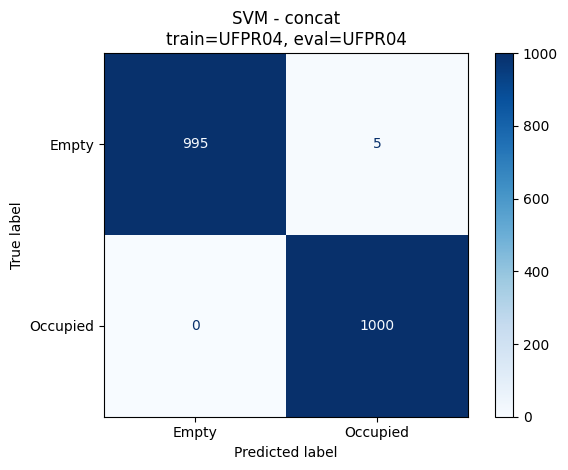

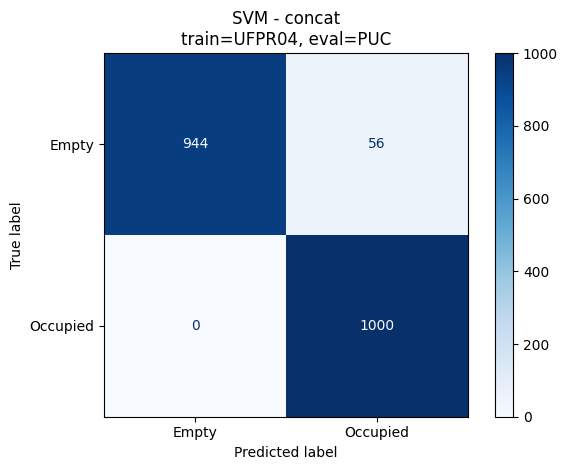

In [21]:
plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="UFPR04",
    eval_dataset="UFPR04",
    fusion_name="concat",
    algo="SVM"
)

plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="UFPR04",
    eval_dataset="PUC",
    fusion_name="concat",
    algo="SVM"
)

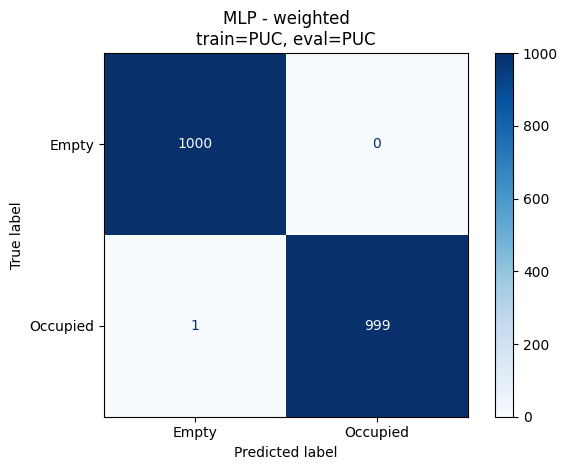

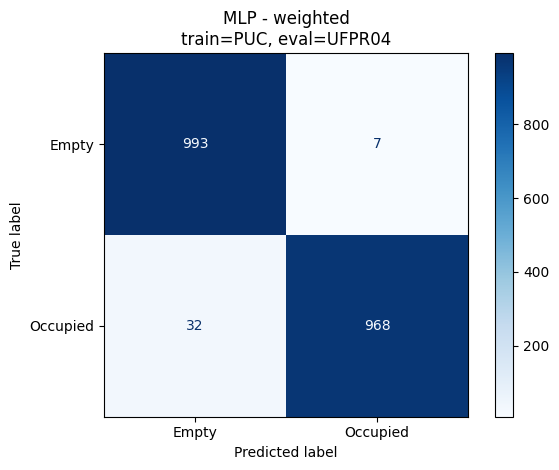

In [22]:
plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="PUC",
    eval_dataset="PUC",
    fusion_name="weighted",
    algo="MLP"
)

plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="PUC",
    eval_dataset="UFPR04",
    fusion_name="weighted",
    algo="MLP"
)

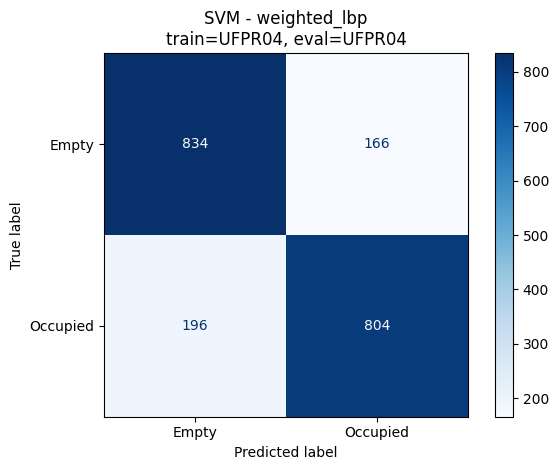

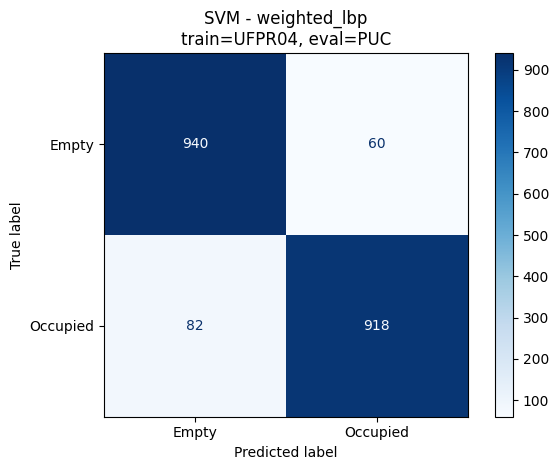

In [ ]:
plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="UFPR04",
    eval_dataset="UFPR04",
    fusion_name="weighted_lbp",
    algo="SVM"
)

plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="UFPR04",
    eval_dataset="PUC",
    fusion_name="weighted_lbp",
    algo="SVM"
)

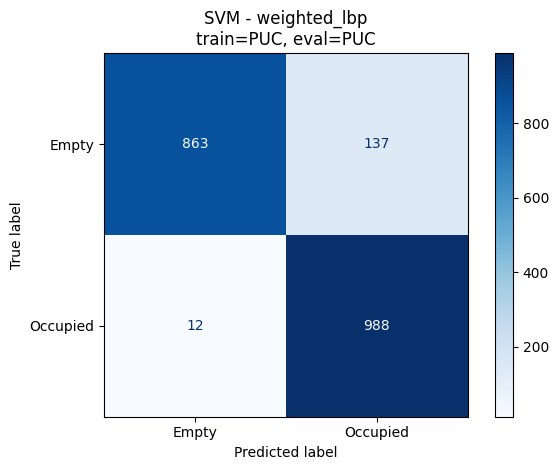

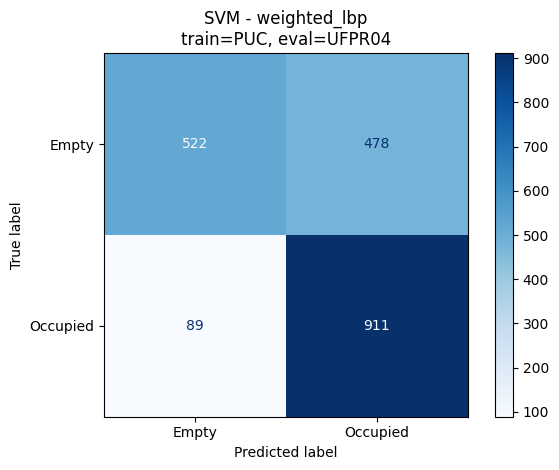

In [70]:
plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="PUC",
    eval_dataset="PUC",
    fusion_name="weighted_lbp",
    algo="SVM"
)

plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="PUC",
    eval_dataset="UFPR04",
    fusion_name="weighted_lbp",
    algo="SVM"
)

In [23]:
df_cv_results = cross_validate_all(datasets_fusions, random_state=42, cv_splits=5)
df_cv_results

[CV] UFPR04 | concat | SVM -> F1=0.9994 ± 0.0008
[CV] UFPR04 | concat | MLP -> F1=0.9987 ± 0.0008
[CV] UFPR04 | mean | SVM -> F1=0.9993 ± 0.0006
[CV] UFPR04 | mean | MLP -> F1=0.9990 ± 0.0010
[CV] UFPR04 | sum | SVM -> F1=0.9993 ± 0.0006
[CV] UFPR04 | sum | MLP -> F1=0.9990 ± 0.0010
[CV] UFPR04 | weighted | SVM -> F1=0.9991 ± 0.0008
[CV] UFPR04 | weighted | MLP -> F1=0.9990 ± 0.0007
[CV] UFPR04 | concat_lbp | SVM -> F1=0.8465 ± 0.0038
[CV] UFPR04 | concat_lbp | MLP -> F1=0.8394 ± 0.0052
[CV] UFPR04 | mean_lbp | SVM -> F1=0.8465 ± 0.0038
[CV] UFPR04 | mean_lbp | MLP -> F1=0.8394 ± 0.0052
[CV] UFPR04 | sum_lbp | SVM -> F1=0.8465 ± 0.0038
[CV] UFPR04 | sum_lbp | MLP -> F1=0.8394 ± 0.0052
[CV] UFPR04 | weighted_lbp | SVM -> F1=0.8465 ± 0.0038
[CV] UFPR04 | weighted_lbp | MLP -> F1=0.8394 ± 0.0052
[CV] PUC | concat | SVM -> F1=0.9987 ± 0.0012
[CV] PUC | concat | MLP -> F1=0.9981 ± 0.0014
[CV] PUC | mean | SVM -> F1=0.9989 ± 0.0010
[CV] PUC | mean | MLP -> F1=0.9987 ± 0.0008
[CV] PUC | sum |

,dataset,fusion,algo,cv_splits,f1_cv_mean,f1_cv_std
0,UFPR04,concat,SVM,5,0.999429,0.000833
1,UFPR04,concat,MLP,5,0.998714,0.000833
2,UFPR04,mean,SVM,5,0.999286,0.000639
3,UFPR04,mean,MLP,5,0.999000,0.000969
4,UFPR04,sum,SVM,5,0.999286,0.000639
5,UFPR04,sum,MLP,5,0.999000,0.000969
6,UFPR04,weighted,SVM,5,0.999143,0.000833
7,UFPR04,weighted,MLP,5,0.999000,0.000728
8,UFPR04,concat_lbp,SVM,5,0.846532,0.003849
9,UFPR04,concat_lbp,MLP,5,0.839383,0.005178


In [41]:
test_samples_dict = {
    "UFPR04": ufpr04_test,
    "PUC": pucpr_test,
}

df_weather = evaluate_by_weather_all(
    models_dict,
    datasets_fusions,
    test_samples_dict,
    average_key="weighted avg",
)
df_weather

,train_dataset,eval_dataset,algo,fusion,weather,n_samples,f1_weighted_avg,f1_macro,f1_weighted
0,UFPR04,UFPR04,SVM,concat,Cloudy,761,1.000000,1.000000,1.000000
1,UFPR04,UFPR04,SVM,concat,Rainy,133,0.992495,0.992078,0.992495
2,UFPR04,UFPR04,SVM,concat,Sunny,1106,0.996381,0.996223,0.996381
3,UFPR04,PUC,SVM,concat,Cloudy,843,0.977568,0.976506,0.977568
4,UFPR04,PUC,SVM,concat,Rainy,594,0.982973,0.977400,0.982973
...,...,...,...,...,...,...,...,...,...
187,PUC,UFPR04,MLP,weighted_lbp,Rainy,133,0.799787,0.794011,0.799787
188,PUC,UFPR04,MLP,weighted_lbp,Sunny,1106,0.747181,0.730868,0.747181
189,PUC,PUC,MLP,weighted_lbp,Cloudy,843,0.940016,0.937524,0.940016
190,PUC,PUC,MLP,weighted_lbp,Rainy,594,0.957483,0.943629,0.957483


In [66]:
q5 = df_weather.query("weather == 'Sunny'").sort_values(by="f1_weighted_avg", ascending=False)
print(q5['f1_weighted_avg'].mean())
display(q5.head(5), q5.tail(5))

0.912511326890264


,train_dataset,eval_dataset,algo,fusion,weather,n_samples,f1_weighted_avg,f1_macro,f1_weighted
107,PUC,PUC,MLP,concat,Sunny,563,1.0,1.0,1.0
143,PUC,PUC,MLP,weighted,Sunny,563,1.0,1.0,1.0
113,PUC,PUC,SVM,mean,Sunny,563,1.0,1.0,1.0
119,PUC,PUC,MLP,mean,Sunny,563,1.0,1.0,1.0
137,PUC,PUC,SVM,weighted,Sunny,563,1.0,1.0,1.0


,train_dataset,eval_dataset,algo,fusion,weather,n_samples,f1_weighted_avg,f1_macro,f1_weighted
164,PUC,UFPR04,MLP,mean_lbp,Sunny,1106,0.747181,0.730868,0.747181
170,PUC,UFPR04,SVM,sum_lbp,Sunny,1106,0.717302,0.695620,0.717302
158,PUC,UFPR04,SVM,mean_lbp,Sunny,1106,0.717302,0.695620,0.717302
182,PUC,UFPR04,SVM,weighted_lbp,Sunny,1106,0.717302,0.695620,0.717302
146,PUC,UFPR04,SVM,concat_lbp,Sunny,1106,0.717302,0.695620,0.717302


In [67]:
q6 = df_weather.query("weather == 'Rainy'").sort_values(by="f1_weighted_avg", ascending=False)
print(q6['f1_weighted_avg'].mean())
display(q6.head(5), q6.tail(5))

0.9345628759973327


,train_dataset,eval_dataset,algo,fusion,weather,n_samples,f1_weighted_avg,f1_macro,f1_weighted
97,PUC,UFPR04,SVM,concat,Rainy,133,1.000000,1.000000,1.000000
103,PUC,UFPR04,MLP,concat,Rainy,133,1.000000,1.000000,1.000000
142,PUC,PUC,MLP,weighted,Rainy,594,0.998318,0.997794,0.998318
136,PUC,PUC,SVM,weighted,Rainy,594,0.998318,0.997794,0.998318
130,PUC,PUC,MLP,sum,Rainy,594,0.998318,0.997794,0.998318


,train_dataset,eval_dataset,algo,fusion,weather,n_samples,f1_weighted_avg,f1_macro,f1_weighted
151,PUC,UFPR04,MLP,concat_lbp,Rainy,133,0.799787,0.794011,0.799787
157,PUC,UFPR04,SVM,mean_lbp,Rainy,133,0.731901,0.728571,0.731901
169,PUC,UFPR04,SVM,sum_lbp,Rainy,133,0.731901,0.728571,0.731901
145,PUC,UFPR04,SVM,concat_lbp,Rainy,133,0.731901,0.728571,0.731901
181,PUC,UFPR04,SVM,weighted_lbp,Rainy,133,0.731901,0.728571,0.731901


In [68]:
q7 = df_weather.query("weather == 'Cloudy'").sort_values(by="f1_weighted_avg", ascending=False)
print(q7['f1_weighted_avg'].mean())
display(q7.head(5), q7.tail(5))

0.930198852406014


,train_dataset,eval_dataset,algo,fusion,weather,n_samples,f1_weighted_avg,f1_macro,f1_weighted
0,UFPR04,UFPR04,SVM,concat,Cloudy,761,1.0,1.0,1.0
99,PUC,PUC,SVM,concat,Cloudy,843,1.0,1.0,1.0
105,PUC,PUC,MLP,concat,Cloudy,843,1.0,1.0,1.0
111,PUC,PUC,SVM,mean,Cloudy,843,1.0,1.0,1.0
117,PUC,PUC,MLP,mean,Cloudy,843,1.0,1.0,1.0


,train_dataset,eval_dataset,algo,fusion,weather,n_samples,f1_weighted_avg,f1_macro,f1_weighted
162,PUC,UFPR04,MLP,mean_lbp,Cloudy,761,0.742723,0.738983,0.742723
156,PUC,UFPR04,SVM,mean_lbp,Cloudy,761,0.689132,0.689855,0.689132
168,PUC,UFPR04,SVM,sum_lbp,Cloudy,761,0.689132,0.689855,0.689132
144,PUC,UFPR04,SVM,concat_lbp,Cloudy,761,0.689132,0.689855,0.689132
180,PUC,UFPR04,SVM,weighted_lbp,Cloudy,761,0.689132,0.689855,0.689132


In [26]:
df_errors = collect_errors_for_model(
    models_dict,
    datasets_fusions,
    test_samples_dict,
    train_dataset="UFPR04",
    eval_dataset="PUC",
    fusion_name="concat",
    algo="SVM",
)
df_errors.head()

,idx,path,lot,weather,day,true_label,pred_label,correct,error_type
0,22,PKLot/PKLot/PKLotSegmented\PUC\Cloudy\2012-10-...,PUC,Cloudy,2012-10-13,Empty,Occupied,False,FP
1,78,PKLot/PKLot/PKLotSegmented\PUC\Sunny\2012-10-2...,PUC,Sunny,2012-10-27,Empty,Occupied,False,FP
2,82,PKLot/PKLot/PKLotSegmented\PUC\Cloudy\2012-10-...,PUC,Cloudy,2012-10-31,Empty,Occupied,False,FP
3,112,PKLot/PKLot/PKLotSegmented\PUC\Rainy\2012-10-1...,PUC,Rainy,2012-10-11,Empty,Occupied,False,FP
4,144,PKLot/PKLot/PKLotSegmented\PUC\Cloudy\2012-10-...,PUC,Cloudy,2012-10-13,Empty,Occupied,False,FP


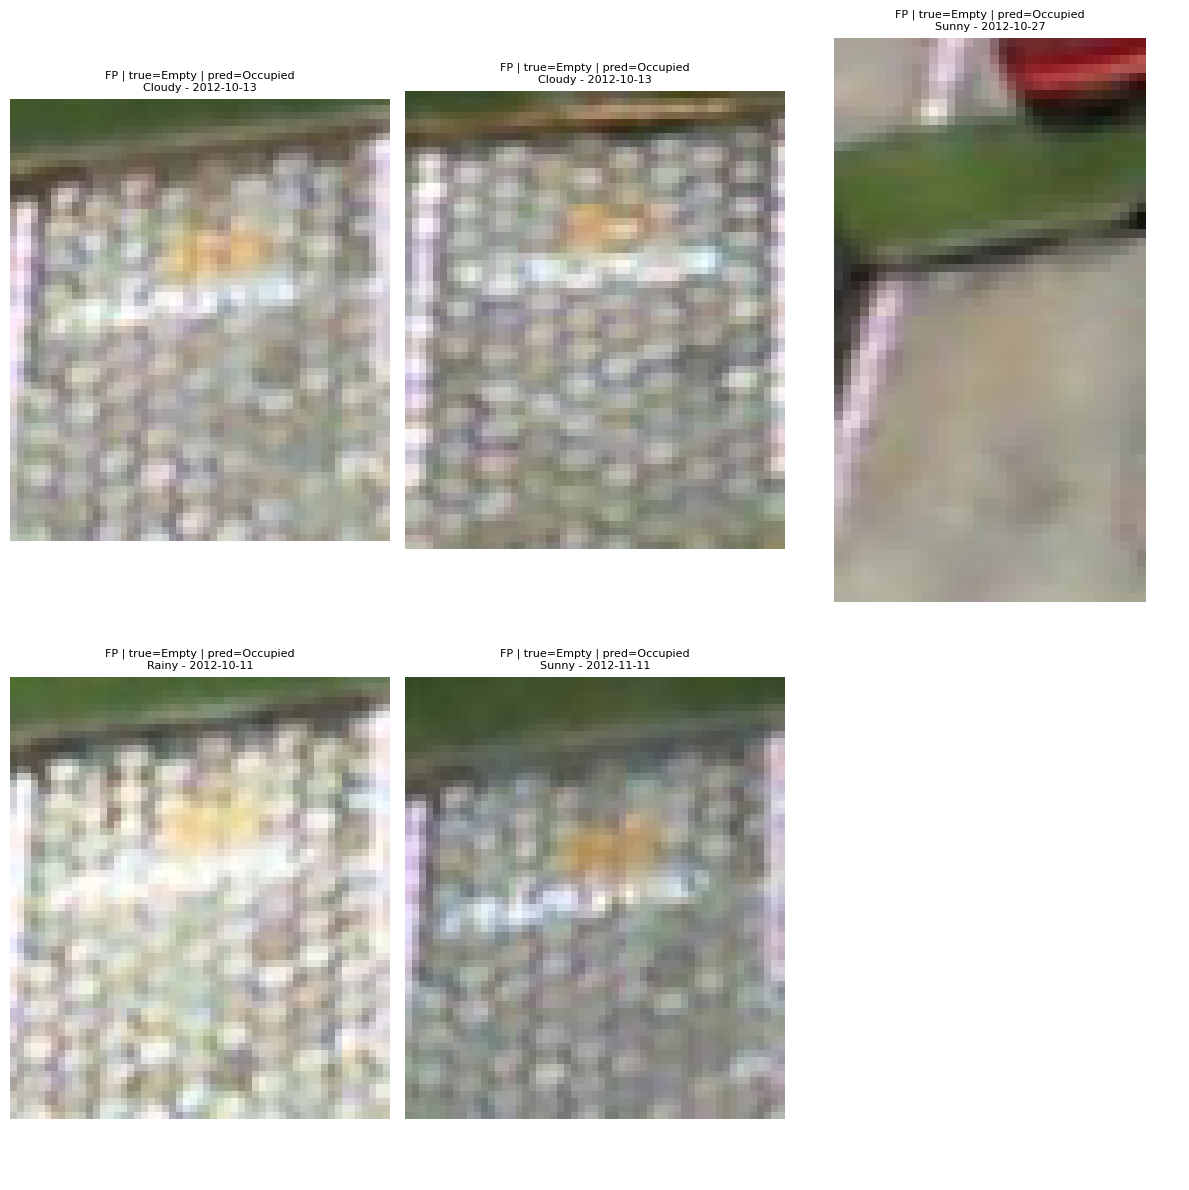

In [40]:
plot_error_examples(df_errors, error_type="FP", n=5)

In [28]:
plot_error_examples(df_errors, error_type="FN", n=5)

Nenhum exemplo do tipo FN.


# Rodando os modelos para dados que não foram vistos em nenhuma etapa

In [50]:
ufpr05_train, ufpr05_test, ufpr05_train_days, ufpr05_test_days = make_train_test_split_for_lot(
    base_dir,
    lot_name="UFPR05",
)

In [51]:
new_feats, new_y = compute_cnn_features_for_split(
    ufpr05_train,
    batch_size=64,
    num_workers=4,
)

c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weight

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [52]:
# fazendo para lbp
new_lbp_feats, new_lbp_y = compute_texture_features_for_split(ufpr05_train)

In [53]:
X_new_concat = fuse_concat(new_feats)
X_new_mean = fuse_mean(new_feats)
X_new_sum = fuse_sum(new_feats)
X_new_weighted = fuse_weighted(new_feats, weights)
X_new_concat_lbp = fuse_concat(new_lbp_feats)
X_new_mean_lbp = fuse_mean(new_lbp_feats)
X_new_sum_lbp = fuse_sum(new_lbp_feats)
X_new_weighted_lbp = fuse_weighted(new_lbp_feats, weights_lbp)

In [54]:
new_fusions_ufpr05 = {
    "concat": (X_new_concat, new_y),
    "mean": (X_new_mean, new_y),
    "sum": (X_new_sum, new_y),
    "weighted": (X_new_weighted, new_y),
    'concat_lbp': (X_new_concat_lbp, new_lbp_y),
    'mean_lbp': (X_new_mean_lbp, new_lbp_y),
    'sum_lbp': (X_new_sum_lbp, new_lbp_y),
    'weighted_lbp': (X_new_weighted_lbp, new_lbp_y),
}

In [55]:
df_new_eval = evaluate_models_on_new_fusions(
    models_dict=models_dict,
    new_fusions=new_fusions_ufpr05,
    new_dataset_name="UFPR05_NEW",
    average_key="weighted avg",
)
df_new_eval

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
0,UFPR04,UFPR05_NEW,SVM,concat,0.991857,0.991857,0.991857
1,UFPR04,UFPR05_NEW,MLP,concat,0.991428,0.991428,0.991428
2,UFPR04,UFPR05_NEW,SVM,mean,0.993857,0.993857,0.993857
3,UFPR04,UFPR05_NEW,MLP,mean,0.994000,0.994000,0.994000
4,UFPR04,UFPR05_NEW,SVM,sum,0.993857,0.993857,0.993857
5,UFPR04,UFPR05_NEW,MLP,sum,0.994000,0.994000,0.994000
6,UFPR04,UFPR05_NEW,SVM,weighted,0.992714,0.992714,0.992714
7,UFPR04,UFPR05_NEW,MLP,weighted,0.993428,0.993428,0.993428
8,UFPR04,UFPR05_NEW,SVM,concat_lbp,0.824194,0.824194,0.824194
9,UFPR04,UFPR05_NEW,MLP,concat_lbp,0.813325,0.813325,0.813325
